<img src="https://i.imgur.com/6U6q5jQ.png"/>

<a target="_blank" href="https://colab.research.google.com/github/SocialAnalytics-StrategicIntelligence/GeoDFBasics_py/blob/main/index.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# The Geo Dataframe

The geodataframe (GDF) is a dataframe (DF) where every row represents an spatial element (point, line, polygon).

Historically, the most common file type that stores spatial elements is the shapefile. Let's take a look at some of them:

1. In GitHub (cloud), create a repository named: introgeodf.
2. Clone that repo to a local folder in your computer.
3. In that local folder in your computer, create a folder named **maps**.
4. Go to paidea and download three compressed files.
5. Download those files into the folder **maps** in your computer: *countries*, *cities*, and *rivers*.

You may see something like this:

<img src="https://github.com/CienciaDeDatosEspacial/code_and_data/blob/main/mapsFolderImage.png?raw=true">

You can decompress those files:

<img title="a title" alt="Alt text" src="https://github.com/CienciaDeDatosEspacial/code_and_data/blob/main/folderRar_1.png?raw=true">

Now, take a look a **World_Countries**:

<img src="https://github.com/CienciaDeDatosEspacial/code_and_data/blob/main/imageCountries_shp.png?raw=true">

There, you see that this **one map** requires **several files**. That is the nature of the shapefile.

Let's read the file with the help of **geopandas**:

In [2]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("mapas","World_Countries","World_Countries.shp"))

Let's use some familiar DF functions:

In [3]:
# what is it?
type(countries)

geopandas.geodataframe.GeoDataFrame

In [4]:
# dimensions
countries.shape

(252, 2)

In [5]:
# names
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [7]:
# some content
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [9]:
# any missing values?
countries[countries.isna().any(axis=1)]

,COUNTRY,geometry


In [10]:
# types
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


As you see, every pandas command is working, but now we have a new column type: **geometry**. Let's see this map of countries:

<Axes: >

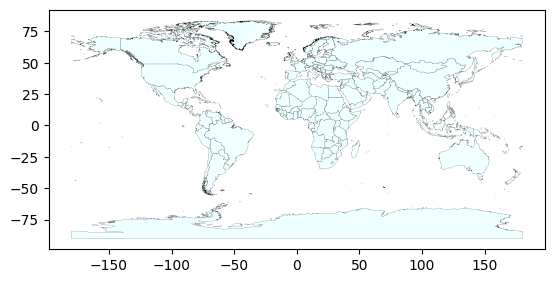

In [11]:
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='black', #color of lines
               linewidth=0.1) #thickness of lines

Let's open the other maps:

In [13]:
rivers=gpd.read_file(os.path.join("mapas","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("mapas","World_Cities","World_Cities.shp"))

This is the rivers map:

<Axes: >

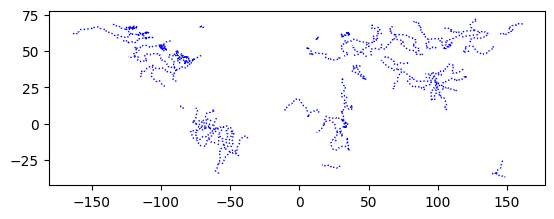

In [14]:
rivers.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

This is the cities map:

<Axes: >

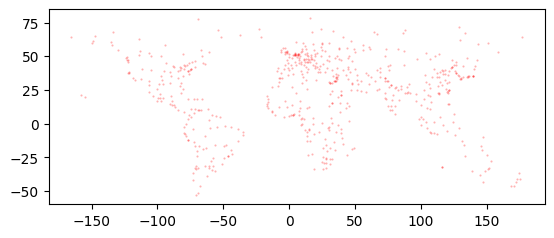

In [15]:
cities.plot(marker='.', # marker type
            color='red',
            markersize=1,
            alpha=0.3) # transparency

You can plot all the layers, as long as they share the same projection.
Let's verify that all have the same projection (**CRS**):

In [16]:
countries.crs==cities.crs==cities.crs

True

You can start by creating the layer on the back (the base), and add layers on top:

<Axes: >

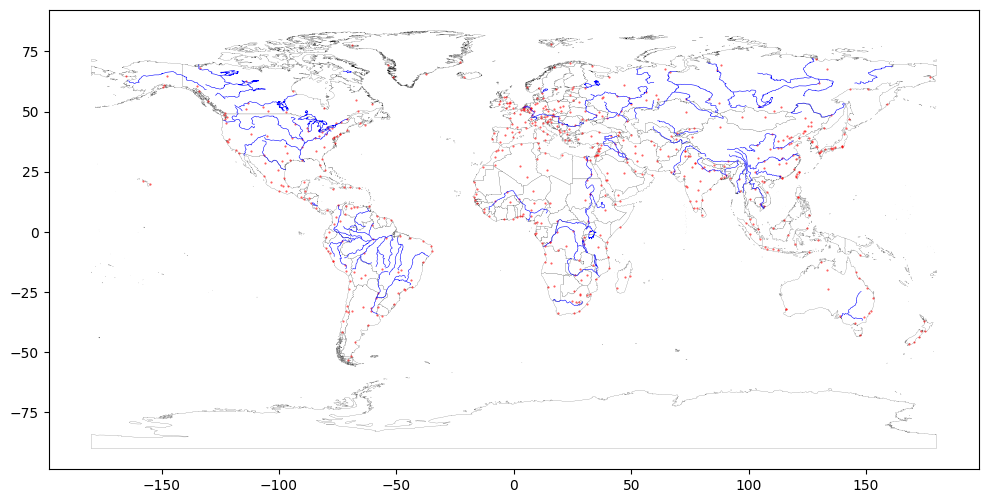

In [17]:
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of...
cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of...


In [19]:
countries.to_file(os.path.join("mapas","worldMap.gpkg"),layer='countryBorders', driver="GPKG")
rivers.to_file(os.path.join("mapas","worldMap.gpkg"),layer='riverLines', driver="GPKG")
cities.to_file(os.path.join("mapas","worldMap.gpkg"),layer='cityPoints', driver="GPKG")

## Subsetting

You can subset your map by *filtering*:

In [20]:
brazil=countries[countries.COUNTRY=='Brazil']

But you can also subset by *clipping*, as sometimes other data frames may not have the same fields for filtering:

In [21]:
citiesBrazil_clipped = gpd.clip(gdf=cities,
                          mask=brazil)
riversBrazil_clipped = gpd.clip(gdf=rivers,
                               mask=brazil)

Then, you can plot the clipped version:

<Axes: >

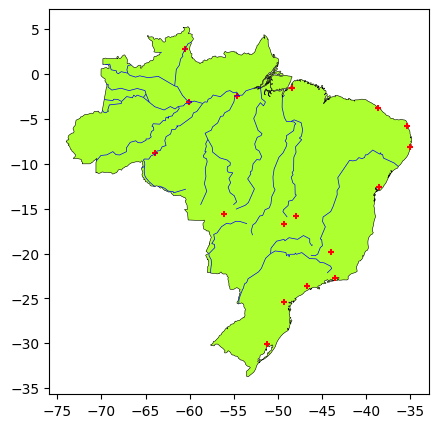

In [22]:
base = brazil.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesBrazil_clipped.plot(marker='+', color='red', markersize=15,
                    ax=base)
riversBrazil_clipped.plot(edgecolor='blue', linewidth=0.5,
                    ax=base)

You can also check what geometries you have in your GDF:

In [23]:
brazil.geom_type

29    MultiPolygon
dtype: object

In [24]:
citiesBrazil_clipped.geom_type

285    Point
279    Point
276    Point
271    Point
268    Point
340    Point
275    Point
274    Point
568    Point
266    Point
447    Point
261    Point
338    Point
380    Point
381    Point
318    Point
421    Point
dtype: object

In [25]:
riversBrazil_clipped.geom_type

56         LineString
55         LineString
97         LineString
67         LineString
70         LineString
38         LineString
24    MultiLineString
5          LineString
64         LineString
68         LineString
83    MultiLineString
92    MultiLineString
59         LineString
37         LineString
80         LineString
1     MultiLineString
60         LineString
29    MultiLineString
66    MultiLineString
62         LineString
54         LineString
dtype: object

Notice that the amount of elements (rows) is different, and that all those elements do not belong to the exact geometry type.

<a class="anchor" id="1"></a>

## Map Projection

The CRS is a very important property of the maps. They affect three aspects:

* shape
* area
* scale
* direction

Most maps come with a default CRS: 4326. Pay attention:

In [26]:
# check units
brazil.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

Polygons have a centroid. When we try getting a centroid from an **unprojected** polygon, you get:

In [27]:
# centroid
brazil.centroid

C:\Users\maria\AppData\Local\Temp\ipykernel_26156\515368123.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  brazil.centroid


29    POINT (-53.09009 -10.77302)
dtype: geometry

### Reprojecting

A projected CRS will have units in meters or feet (or similar). You can request a crs per country [here](https://epsg.io/?q=brazil+kind%3APROJCRS):

In [28]:
# recommended for Brazil (meters)
brazil.to_crs(5641).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [29]:
# now this works
brazil.to_crs(5641).centroid

29    POINT (3884486.179 8756856.093)
dtype: geometry

<Axes: >

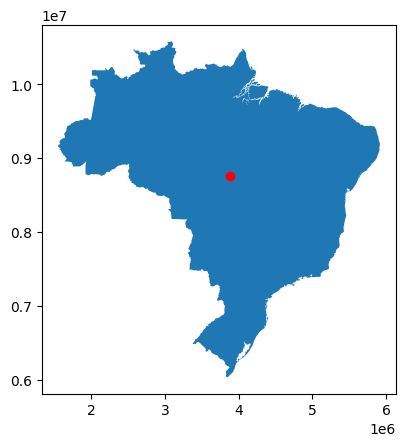

In [30]:
# replotting:

base5641=brazil.to_crs(5641).plot()
brazil.to_crs(5641).centroid.plot(color='red',ax=base5641)

Let's keep the projected version for all our maps:

In [31]:
brazil_5641=brazil.to_crs(5641)

cities_brazil_5641=citiesBrazil_clipped.to_crs(brazil_5641.crs)

rivers_brazil_5641=riversBrazil_clipped.to_crs(brazil_5641.crs)



In [33]:
# saving
import os

brazil_5641.to_file(os.path.join("mapas","brazilMaps_5641.gpkg"), layer='country', driver="GPKG")
cities_brazil_5641.to_file(os.path.join("mapas","brazilMaps_5641.gpkg"), layer='cities', driver="GPKG")
rivers_brazil_5641.to_file(os.path.join("mapas","brazilMaps_5641.gpkg"), layer='rivers', driver="GPKG")

In [34]:
brazil_5641.centroid

29    POINT (3884486.179 8756856.093)
dtype: geometry

In [36]:
brazil_5641.centroid.to_file(os.path.join("mapas","brazilMaps_5641.gpkg"), layer='centroid', driver="GPKG")

<a class="anchor" id="3"></a>

## Creating Spatial data

You will get Lines and Polygons as maps for sure, but that may not be the case with points. Let me download a **CSV** file with information on the airports in Brazil from this [website](https://data.humdata.org/dataset/ourairports-bra), I will save it in my **data** folder:

In [37]:
import pandas as pd
infoairports=pd.read_csv(os.path.join("data","br-airports.csv"))

# some rows

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,#meta +id,#meta +code,#loc +airport +type,#loc +airport +name,#geo +lat,#geo +lon,#geo +elevation +ft,#region +continent +code,#country +name,#country +code +iso2,...,#loc +municipality +name,#status +scheduled,#loc +airport +code +gps,#loc +airport +code +iata,#loc +airport +code +local,#meta +url +airport,#meta +url +wikipedia,#meta +keywords,#meta +score,#date +updated
1,5910,SBGR,large_airport,Guarulhos - Governador André Franco Montoro In...,-23.431944,-46.467778,2461,SA,Brazil,BR,...,São Paulo,1,SBGR,GRU,SP0002,http://www.aeroportoguarulhos.net/,https://en.wikipedia.org/wiki/S%C3%A3o_Paulo-G...,Cumbica,1016675,2021-10-28T15:52:55+00:00
2,5906,SBGL,large_airport,Rio Galeão – Tom Jobim International Airport,-22.809999,-43.250557,28,SA,Brazil,BR,...,Rio De Janeiro,1,SBGL,GIG,RJ0001,NaN,https://en.wikipedia.org/wiki/Rio_de_Janeiro-G...,Galeão - Antônio Carlos Jobim International Ai...,51475,2021-10-14T18:09:35+00:00
3,5974,SBSP,medium_airport,Congonhas Airport,-23.627657,-46.654601,2631,SA,Brazil,BR,...,São Paulo,1,SBSP,CGH,SP0001,http://www.infraero.gov.br/usa/aero_prev_home....,https://en.wikipedia.org/wiki/Congonhas-S%C3%A...,http://www.infraero.gov.br/usa/aero_prev_home....,750,2022-05-03T20:10:35+00:00
6668,309669,SSVR,closed,Volta Redonda Airport,-22.4978,-44.085,1245,SA,Brazil,BR,...,Volta Redonda,0,NaN,NaN,NaN,NaN,NaN,"SSVR, SSVR, QVR",0,2013-09-28T14:52:12+00:00
6669,505308,BR-1760,heliport,Unimed Volta Redonda Helipad,-22.533988,-44.076918,1385,SA,Brazil,BR,...,Volta Redonda,0,SSKV,NaN,RJ0147,NaN,NaN,NaN,0,2022-12-06T21:28:25+00:00
6670,341727,BR-1429,heliport,Santa Helena Heliport,-23.59851,-47.441196,2254,SA,Brazil,BR,...,Votorantim,0,SWHE,NaN,SP0807,NaN,NaN,NaN,0,2021-03-07T10:30:07+00:00
6671,343017,BR-1493,heliport,Bandeiras Centro Empresarial Heliport,-23.536615,-47.449475,1827,SA,Brazil,BR,...,Votorantim,0,SWST,NaN,SP1306,NaN,NaN,NaN,0,2021-04-14T20:12:01+00:00


This needs some cleaning:

In [38]:
# bye first row
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,5910,SBGR,large_airport,Guarulhos - Governador André Franco Montoro In...,-23.431944,-46.467778,2461,SA,Brazil,BR,...,São Paulo,1,SBGR,GRU,SP0002,http://www.aeroportoguarulhos.net/,https://en.wikipedia.org/wiki/S%C3%A3o_Paulo-G...,Cumbica,1016675,2021-10-28T15:52:55+00:00
1,5906,SBGL,large_airport,Rio Galeão – Tom Jobim International Airport,-22.809999,-43.250557,28,SA,Brazil,BR,...,Rio De Janeiro,1,SBGL,GIG,RJ0001,NaN,https://en.wikipedia.org/wiki/Rio_de_Janeiro-G...,Galeão - Antônio Carlos Jobim International Ai...,51475,2021-10-14T18:09:35+00:00
2,5974,SBSP,medium_airport,Congonhas Airport,-23.627657,-46.654601,2631,SA,Brazil,BR,...,São Paulo,1,SBSP,CGH,SP0001,http://www.infraero.gov.br/usa/aero_prev_home....,https://en.wikipedia.org/wiki/Congonhas-S%C3%A...,http://www.infraero.gov.br/usa/aero_prev_home....,750,2022-05-03T20:10:35+00:00
3,5967,SBRJ,medium_airport,Santos Dumont Airport,-22.9105,-43.163101,11,SA,Brazil,BR,...,Rio de Janeiro,1,SBRJ,SDU,RJ0002,https://www4.infraero.gov.br/aeroportos/aeropo...,https://en.wikipedia.org/wiki/Santos_Dumont_Ai...,RIO,750,2022-03-28T23:27:00+00:00
4,5872,SBBR,large_airport,Presidente Juscelino Kubitschek International ...,-15.869167,-47.920834,3497,SA,Brazil,BR,...,Brasília,1,SBBR,BSB,DF0001,http://www.infraero.gov.br/usa/aero_prev_home....,https://en.wikipedia.org/wiki/Bras%C3%ADlia_In...,NaN,51275,2020-08-24T11:15:12+00:00


In [39]:
# keep the  columns needed

infoairports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link',
       'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')

In [40]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

In [41]:
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6671 entries, 0 to 6670
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           6671 non-null   object
 1   type           6671 non-null   object
 2   latitude_deg   6671 non-null   object
 3   longitude_deg  6671 non-null   object
 4   elevation_ft   6500 non-null   object
 5   region_name    6671 non-null   object
 6   municipality   6647 non-null   object
dtypes: object(7)
memory usage: 364.9+ KB


Some formatting:

In [42]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# now
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6671 entries, 0 to 6670
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6671 non-null   object 
 1   type           6671 non-null   object 
 2   latitude_deg   6671 non-null   float64
 3   longitude_deg  6671 non-null   float64
 4   elevation_ft   6500 non-null   float64
 5   region_name    6671 non-null   object 
 6   municipality   6647 non-null   object 
dtypes: float64(3), object(4)
memory usage: 364.9+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

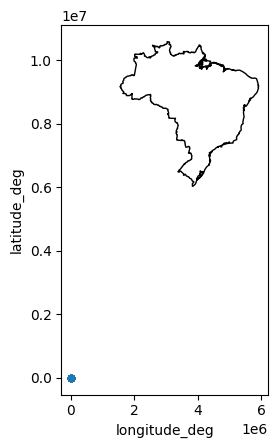

In [43]:
# let's plot

base = brazil_5641.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

Why is it wrong?

In [44]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg),
                 crs=brazil.crs.to_epsg())# the coordinates were in degrees - unprojected

<Axes: >

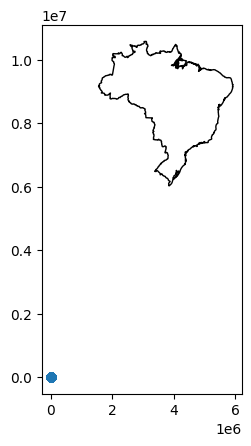

In [45]:
# does it look better?

# let's plot

base = brazil_5641.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [46]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

Let's keep the projected version:

<Axes: >

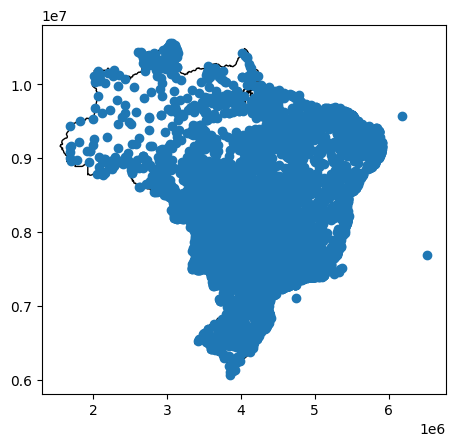

In [47]:
airports_5641=airports.to_crs(5641)

## then

base = brazil_5641.plot(color='white', edgecolor='black')
airports_5641.plot(ax=base)

Remember you have type of airports:

In [48]:
airports_5641['type'].value_counts() # this will not work: airports.type.value_counts()

type
small_airport     4587
heliport          1699
closed             251
medium_airport     124
large_airport        8
seaplane_base        2
Name: count, dtype: int64

We may use that in the future. For now, just rename the **type** column to a different one.

In [49]:
airports_5641.rename(columns={'type':'kind'},inplace=True)

In [51]:
# adding the airports
airports_5641.to_file(os.path.join("mapas","brazilMaps_5641.gpkg"), layer='airports', driver="GPKG")

## Geo Merging

Remember we have these data:

In [52]:
countries

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
...,...,...
247,South Sudan,"POLYGON ((34.21807 9.96458, 34.20722 9.905, 34..."
248,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832..."
249,East Timor,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -..."
250,Curacao (Netherlands),"POLYGON ((-68.96556 12.19889, -68.91196 12.181..."


This map has no interesting information beyond the geometry. Let me bring this info:

In [53]:
fragilityLink="https://github.com/SocialAnalytics-StrategicIntelligence/TableOperations/raw/main/dataFiles/fragility/fragilityCoded_2012_2023.pkl"

fragility=pd.read_pickle(fragilityLink)

fragility.head()

,Country,Year,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,E3_HumanFlightandBrainDrain,P1_StateLegitimacy,P2_PublicServices,P3_HumanRights,S1_DemographicPressures,S2_RefugeesandIDPs,X1_ExternalIntervention,iso2,iso3,Total_mnmx
0,SOMALIA,2013,113.900000,9.7,10.0,9.3,9.4,8.4,8.9,9.500000,9.8,10.0,9.5,10.0,9.400000,SO,SOM,10.000000
1,SOMALIA,2023,111.900000,9.5,10.0,8.7,9.5,9.1,8.6,9.600000,9.8,9.0,10.0,9.0,9.100000,SO,SOM,10.000000
2,SOMALIA,2018,113.200796,9.7,10.0,9.0,8.9,9.3,9.5,9.119045,9.3,9.6,10.0,9.7,9.081752,SO,SOM,9.983597
3,SOMALIA,2014,112.600000,9.4,10.0,9.3,9.1,8.7,8.9,9.100000,9.6,9.8,9.5,10.0,9.200000,SO,SOM,9.968153
4,SOMALIA,2015,114.000000,9.7,10.0,9.5,9.1,9.0,9.2,9.300000,9.3,10.0,9.6,9.8,9.500000,SO,SOM,9.948347


We want to add the fragility data into the map. That is the merging process.
For that, we need a common column. The country names is the option.

In [54]:
# to upper case.
countries['COUNTRY']=countries.COUNTRY.str.upper()

It is very unlikely the names are written the same. Verify:

In [55]:
onlyFragil=set(fragility.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragility.Country)

Check here:

In [56]:
onlyFragil

{'BRUNEI DARUSSALAM',
 'CONGO DEMOCRATIC REPUBLIC',
 'CONGO REPUBLIC',
 "COTE D'IVOIRE",
 'ESWATINI',
 'GUINEA BISSAU',
 'KYRGYZ REPUBLIC',
 'MICRONESIA',
 'SAMOA',
 'SLOVAK REPUBLIC',
 'TIMOR-LESTE'}

In [57]:
# and here
onlyMap

{'AMERICAN SAMOA (US)',
 'AMERICAN VIRGIN ISLANDS (US)',
 'ANDORRA',
 'ANGUILLA (UK)',
 'ANTARCTICA',
 'ARUBA (NETHERLANDS)',
 'BAKER ISLAND (US)',
 'BERMUDA (UK)',
 'BONAIRE (NETHERLANDS)',
 'BOUVET ISLAND (NORWAY)',
 'BRITISH INDIAN OCEAN TERRITORY (UK)',
 'BRITISH VIRGIN ISLANDS(UK)',
 'BRUNEI',
 'CAYMAN ISLANDS (UK)',
 'CHRISTMAS ISLAND (AUSTRALIA)',
 'COCOS (KEELING) ISLANDS (AUSTRALIA)',
 'CONGO',
 'COOK ISLANDS (NEW ZEALAND)',
 'CURACAO (NETHERLANDS)',
 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'DOMINICA',
 'EAST TIMOR',
 'FALKLAND ISLANDS (UK)',
 'FAROE ISLANDS (DENMARK)',
 'FEDERATED STATES OF MICRONESIA',
 'FRENCH GUIANA (FRANCE)',
 'FRENCH POLYNESIA (FRANCE)',
 'FRENCH SOUTHERN & ANTARCTIC LANDS (FRANCE)',
 'GIBRALTAR (UK)',
 'GLORIOSO ISLANDS (FRANCE)',
 'GREENLAND (DENMARK)',
 'GUADELOUPE (FRANCE)',
 'GUAM (US)',
 'GUERNSEY (UK)',
 'GUINEA-BISSAU',
 'HEARD ISLAND & MCDONALD ISLANDS (AUSTRALIA)',
 'HOWLAND ISLAND (US)',
 'ISLE OF MAN (UK)',
 'IVORY COAST',
 'JAN MAYEN (NORWAY)',

## Fuzzy merging

Let's find similar names:

In [58]:
from thefuzz import process

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragil)]

[('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CONGO DEMOCRATIC REPUBLIC', ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO REPUBLIC', ('CONGO', 90)),
 ("COTE D'IVOIRE", ('IVORY COAST', 63)),
 ('ESWATINI', ('LIECHTENSTEIN', 60)),
 ('GUINEA BISSAU', ('GUINEA-BISSAU', 100)),
 ('KYRGYZ REPUBLIC', ('DEMOCRATIC REPUBLIC OF THE CONGO', 86)),
 ('MICRONESIA', ('FEDERATED STATES OF MICRONESIA', 90)),
 ('SAMOA', ('AMERICAN SAMOA (US)', 90)),
 ('SLOVAK REPUBLIC', ('DEMOCRATIC REPUBLIC OF THE CONGO', 86)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [59]:
# subsetting
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragil)
 if process.extractOne(country,onlyMap)[1]>=90]

[('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CONGO DEMOCRATIC REPUBLIC', ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO REPUBLIC', ('CONGO', 90)),
 ('GUINEA BISSAU', ('GUINEA-BISSAU', 100)),
 ('MICRONESIA', ('FEDERATED STATES OF MICRONESIA', 90)),
 ('SAMOA', ('AMERICAN SAMOA (US)', 90))]

Preparing a _dict_ of changes:

In [60]:
# then:
try1={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragil)
 if process.extractOne(country,onlyMap)[1]>=90}
try1

{'BRUNEI DARUSSALAM': 'BRUNEI',
 'CONGO DEMOCRATIC REPUBLIC': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'CONGO REPUBLIC': 'CONGO',
 'GUINEA BISSAU': 'GUINEA-BISSAU',
 'MICRONESIA': 'FEDERATED STATES OF MICRONESIA',
 'SAMOA': 'AMERICAN SAMOA (US)'}

Making changes and updating:

In [61]:
fragility.Country.replace(try1,inplace=True)

# updating
onlyFragil=set(fragility.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragility.Country)

# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragil)]

C:\Users\maria\AppData\Local\Temp\ipykernel_26156\1011014739.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fragility.Country.replace(try1,inplace=True)


[("COTE D'IVOIRE", ('IVORY COAST', 63)),
 ('ESWATINI', ('LIECHTENSTEIN', 60)),
 ('KYRGYZ REPUBLIC', ('KYRGYZSTAN', 68)),
 ('SLOVAK REPUBLIC', ('SLOVAKIA', 77)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [62]:
# then:
try2={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragil)
 if process.extractOne(country,onlyMap)[1]!=60}
try2

{"COTE D'IVOIRE": 'IVORY COAST',
 'KYRGYZ REPUBLIC': 'KYRGYZSTAN',
 'SLOVAK REPUBLIC': 'SLOVAKIA',
 'TIMOR-LESTE': 'EAST TIMOR'}

In [63]:
# changing
fragility.Country.replace(try2,inplace=True)

# new update
onlyFragil=set(fragility.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragility.Country)

# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragil)]

[('ESWATINI', ('LIECHTENSTEIN', 60))]

At this stage, we go manual:

In [64]:
fragility.Country.replace({'ESWATINI': 'SWAZILAND'},inplace=True)

#
onlyFragil=set(fragility.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragility.Country)

#
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragil)]


[]

We can not improve the situation.

Now, when you merge a GDF with a DF, **the GDF has to be on the left**:

In [65]:
theMapAndData=countries.merge(fragility,left_on='COUNTRY', right_on='Country')
# here it is (new map):
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   COUNTRY                      1969 non-null   object  
 1   geometry                     1969 non-null   geometry
 2   Country                      1969 non-null   object  
 3   Year                         1969 non-null   int64   
 4   Total                        1969 non-null   float64 
 5   C1_SecurityApparatus         1969 non-null   float64 
 6   C2_FactionalizedElites       1969 non-null   float64 
 7   C3_GroupGrievance            1969 non-null   float64 
 8   E1_Economy                   1969 non-null   float64 
 9   E2_EconomicInequality        1969 non-null   float64 
 10  E3_HumanFlightandBrainDrain  1969 non-null   float64 
 11  P1_StateLegitimacy           1969 non-null   float64 
 12  P2_PublicServices            1969 non-null   float64 


# Choropleths

We should plan how to color the polygons based on some variable:

In [66]:
theMapAndData['Total_mnmx'].describe()

count    1969.000000
mean        5.336034
std         2.484143
min         0.000000
25%         3.545360
50%         5.707298
75%         7.111345
max        10.000000
Name: Total_mnmx, dtype: float64

<Axes: >

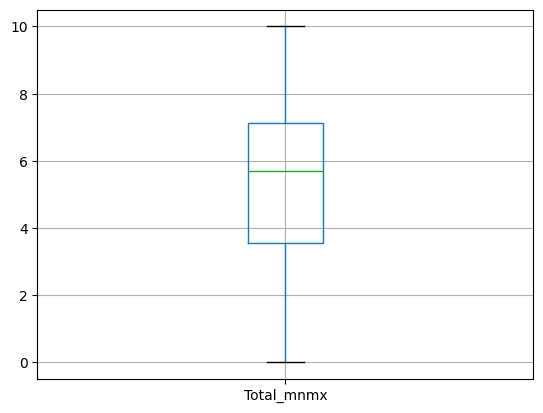

In [67]:
theMapAndData.boxplot(column=['Total_mnmx'])

<Axes: >

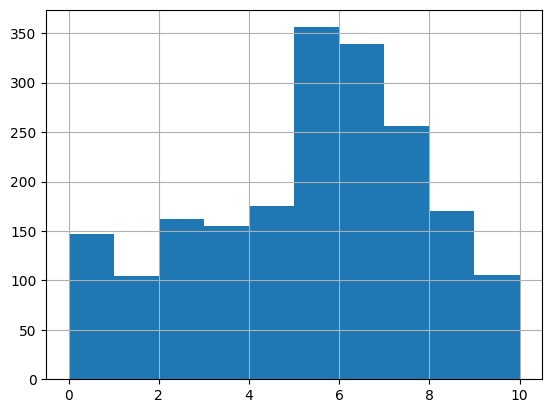

In [68]:
theMapAndData['Total_mnmx'].hist()

Let's see other possibilities to cut the data (instead of the amount of intervals presented in the histogram), but please install [**numba**](https://numba.readthedocs.io/en/stable/user/installing.html) before runing the next code; also make sure you have **pysal**, **mapclassify** and **numpy** installed:

In [69]:
pip show numba pysal mapclassify numpy

Name: numpy
Version: 2.1.1
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2024, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following
       disclaimer in the documentation and/or other materials provided
       with the distribution.

    * Neither the name of the NumPy Developers nor the names of any
       contributors may be used to endorse or promote products derived
       from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRI

In [71]:
!pip install mapclassify

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------ --------------------- 0.8/1.7 MB 4.2 MB/s eta 0:00:01
   ------------------------------------ --- 1.6/1.7 MB 3.6 MB/s eta 0:00:01
   ------------------------------------ --- 1.6/1.7 MB 3.6 MB/s eta 0:00:01
   ------------------------------------ --- 1.6/1.7 MB 3.6 MB/s eta 0:00:01
   ------------------------------------ --- 1.6/1.7 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.0 MB 4.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.6/11.0 MB 4.7 MB/s eta 0:00:03
   --------- ------------------------------ 2.6/11.0 MB 4.6 MB/s eta 0:00:02
   ------------ --------------------------- 3.4/11.0 MB 4.0 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/11.0 MB 3.9 MB/s eta 0:00:02
   -----------------

In [72]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.Total_mnmx
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

C:\Users\maria\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3577: UserWarning: Numba not installed. Using slow pure python version.
  exec(code_obj, self.user_global_ns, self.user_ns)


How can we select the right classification?
Let me use the the Absolute deviation around class median (ADCM) to make the comparisson:

In [73]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

Now, plot the **adcms**:

<Axes: ylabel='Classifier'>

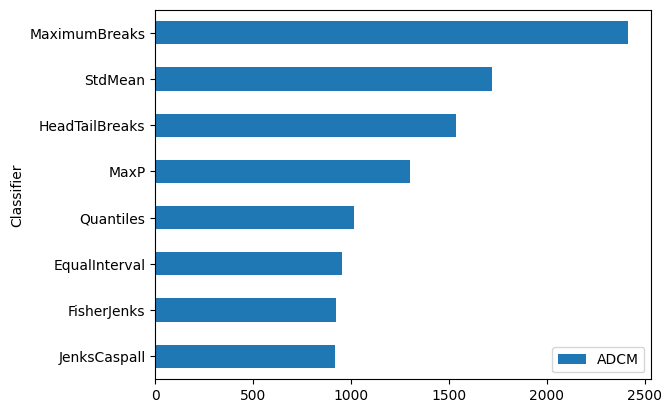

In [74]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

Let's save the best three strategies:

In [75]:
theMapAndData.loc[:,'Total_ei5'] = ei5.yb
theMapAndData.loc[:,'Total_fj5'] = fj5.yb
theMapAndData.loc[:,'Total_jc5'] = jc5.yb

In [76]:
# there you are
theMapAndData.head()

,COUNTRY,geometry,Country,Year,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,...,P3_HumanRights,S1_DemographicPressures,S2_RefugeesandIDPs,X1_ExternalIntervention,iso2,iso3,Total_mnmx,Total_ei5,Total_fj5,Total_jc5
0,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2013,58.000000,4.9,3.7,4.1,4.5,5.6,...,4.400000,4.6,3.0,5.8,AG,ATG,4.171011,2,1,1
1,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2023,53.800000,4.9,3.7,3.6,6.6,5.1,...,3.800000,3.7,2.7,6.1,AG,ATG,4.034908,2,1,1
2,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2018,55.611041,5.7,3.7,3.6,4.8,4.2,...,4.411041,4.6,3.2,5.8,AG,ATG,3.948394,1,1,1
3,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2014,59.000000,4.9,3.7,4.1,4.5,5.3,...,4.700000,4.9,3.3,6.1,AG,ATG,4.278132,2,1,1
4,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2015,57.800000,5.2,3.7,3.9,5.0,5.0,...,4.500000,4.6,3.0,5.8,AG,ATG,4.142562,2,1,1


Let's check the mean of 'Total_mnmx' by the labels of the columns created (from '0' to '4')

In [77]:
indexList=['Total_ei5','Total_fj5','Total_jc5']
aggregator={'Total_mnmx': ['mean']}

pd.concat([theMapAndData[['Total_mnmx',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,Total_ei5,Total_mnmx,Total_fj5,Total_mnmx,Total_jc5,Total_mnmx
,,mean,,mean,,mean
0,0,0.901965,0,0.937088,0,0.901965
1,1,3.027346,1,3.199770,1,3.193175
2,2,5.227688,2,5.433028,2,5.466820
3,3,6.906840,3,6.964059,3,6.940591
4,4,8.862077,4,8.766700,4,8.687480


Verify data types:

In [78]:
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   COUNTRY                      1969 non-null   object  
 1   geometry                     1969 non-null   geometry
 2   Country                      1969 non-null   object  
 3   Year                         1969 non-null   int64   
 4   Total                        1969 non-null   float64 
 5   C1_SecurityApparatus         1969 non-null   float64 
 6   C2_FactionalizedElites       1969 non-null   float64 
 7   C3_GroupGrievance            1969 non-null   float64 
 8   E1_Economy                   1969 non-null   float64 
 9   E2_EconomicInequality        1969 non-null   float64 
 10  E3_HumanFlightandBrainDrain  1969 non-null   float64 
 11  P1_StateLegitimacy           1969 non-null   float64 
 12  P2_PublicServices            1969 non-null   float64 


Let me create a copy of those columns with new names:

In [79]:
newColNames=[ name+"_cat" for name in indexList]

theMapAndData[newColNames]=theMapAndData.loc[:,indexList]
theMapAndData.head()

,COUNTRY,geometry,Country,Year,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,...,X1_ExternalIntervention,iso2,iso3,Total_mnmx,Total_ei5,Total_fj5,Total_jc5,Total_ei5_cat,Total_fj5_cat,Total_jc5_cat
0,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2013,58.000000,4.9,3.7,4.1,4.5,5.6,...,5.8,AG,ATG,4.171011,2,1,1,2,1,1
1,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2023,53.800000,4.9,3.7,3.6,6.6,5.1,...,6.1,AG,ATG,4.034908,2,1,1,2,1,1
2,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2018,55.611041,5.7,3.7,3.6,4.8,4.2,...,5.8,AG,ATG,3.948394,1,1,1,1,1,1
3,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2014,59.000000,4.9,3.7,4.1,4.5,5.3,...,6.1,AG,ATG,4.278132,2,1,1,2,1,1
4,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2015,57.800000,5.2,3.7,3.9,5.0,5.0,...,5.8,AG,ATG,4.142562,2,1,1,2,1,1


In [80]:
# renaming
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData[newColNames]=theMapAndData.loc[:,newColNames].replace(newLabelsForLevels)
theMapAndData.drop(columns=['Country'],inplace=True)
theMapAndData

,COUNTRY,geometry,Year,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,E3_HumanFlightandBrainDrain,...,X1_ExternalIntervention,iso2,iso3,Total_mnmx,Total_ei5,Total_fj5,Total_jc5,Total_ei5_cat,Total_fj5_cat,Total_jc5_cat
0,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2013,58.000000,4.900000,3.7,4.1,4.5,5.6,7.6,...,5.8,AG,ATG,4.171011,2,1,1,2_Middle,1_Good,1_Good
1,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2023,53.800000,4.900000,3.7,3.6,6.6,5.1,6.2,...,6.1,AG,ATG,4.034908,2,1,1,2_Middle,1_Good,1_Good
2,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2018,55.611041,5.700000,3.7,3.6,4.8,4.2,6.7,...,5.8,AG,ATG,3.948394,1,1,1,1_Good,1_Good,1_Good
3,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2014,59.000000,4.900000,3.7,4.1,4.5,5.3,7.6,...,6.1,AG,ATG,4.278132,2,1,1,2_Middle,1_Good,1_Good
4,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2015,57.800000,5.200000,3.7,3.9,5.0,5.0,7.3,...,5.8,AG,ATG,4.142562,2,1,1,2_Middle,1_Good,1_Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -...",2020,82.663114,6.463114,8.3,5.6,7.2,6.5,7.3,...,8.9,TL,TLS,6.955837,3,3,3,3_Bad,3_Bad,3_Bad
1965,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -...",2016,90.800000,7.400000,8.3,6.7,8.1,7.0,7.3,...,9.0,TL,TLS,7.563025,3,3,3,3_Bad,3_Bad,3_Bad
1966,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -...",2017,90.500000,7.200000,8.3,6.5,7.9,6.8,7.6,...,9.5,TL,TLS,7.542017,3,3,3,3_Bad,3_Bad,3_Bad
1967,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -...",2021,80.900000,6.200000,8.3,5.3,7.7,6.2,7.0,...,8.6,TL,TLS,6.774869,3,3,3,3_Bad,3_Bad,3_Bad


We are ready for a choropleth:

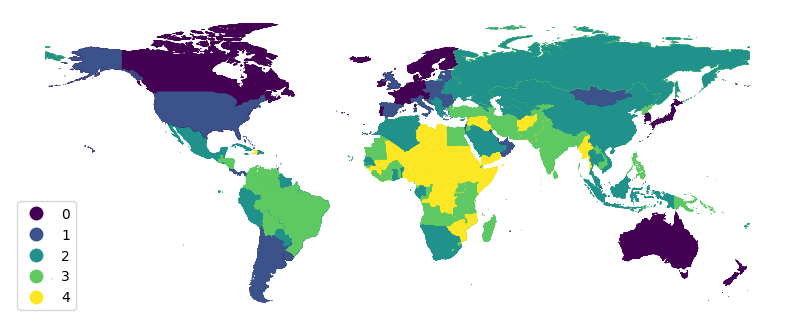

In [81]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='Total_ei5', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

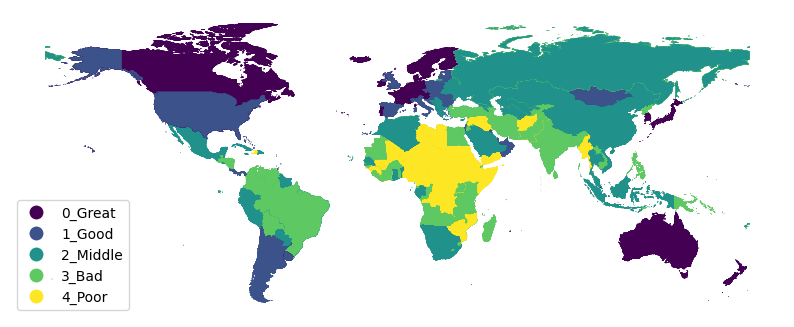

In [82]:
# alternatively:

import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='Total_ei5_cat', # annotated
        cmap='viridis',
        categorical=True,
        edgecolor='white',
        linewidth=0.,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

Once you know the ADCM, you can request the choropleth without creating a variable:

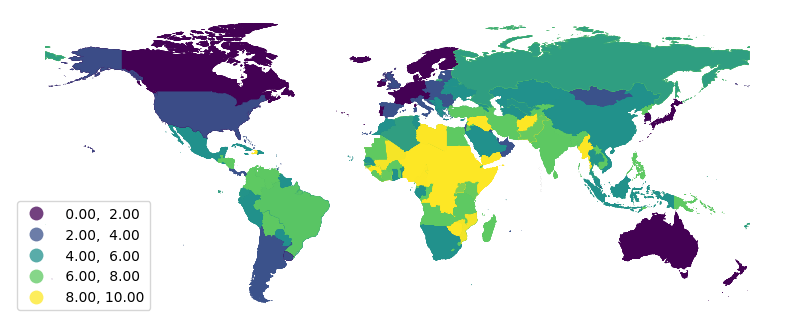

In [83]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='Total_mnmx',
        cmap='viridis',
                   scheme="equal_interval",
        edgecolor='white',
        linewidth=0.,
        alpha=0.75,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

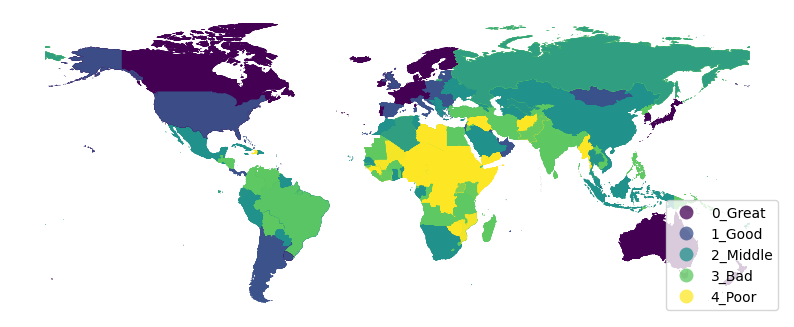

In [84]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='Total_ei5_cat',
        cmap='viridis',
        categorical=True,
        edgecolor='white',
        linewidth=0.,
        alpha=0.75,
        legend=True,
        legend_kwds={'loc':"lower right"},
        ax=ax
       )

ax.set_axis_off()

Let's save our data

In [85]:
theMapAndData.to_file(os.path.join("maps","theMapAndData.gpkg"), layer='fragility', driver="GPKG")

DataSourceError: sqlite3_open(maps\theMapAndData.gpkg) failed: unable to open database file

<div class="alert alert-danger">
  <strong>CHALLENGE 1</strong>
    <br> * Create a public repo named "week2_spatial" with its README file. (1 point)
    <br> * Clone the repo to your computer. (1 point)
    <br> * In the local repo in your computer, create a folder named "data". (1 point)
    <br> * Get Three maps for the same country: the lines can be rivers, highways or similar; the points have to be airports; and the polygons  of the 2rd administrative division ('provinces' in Perú, 'counties' in USA). Download those maps into the "data" folder. You can find airports here: https://ourairports.com/data/ (5 points)
    <br> * Plot in one map the three layers of maps, including the code. (5 points)
    <br> * Publish the three layer map. (3 points)
    <br> * Update the README to offer a quick explanation, the data dictionary, and the link to the published map. (2 points)
    <br> * Make sure the code is well organized (explanations, comments, no warnings, no python messages). (2 points)
    
</div>


<div class="alert alert-danger">
  <strong>CHALLENGE 2</strong>
    <br> * Create a public repo named week2_spatial with its README file. (1 point)
    <br> * Clone the repo to your computer. (1 point)
    <br> * In the local repo in your computer, create a folder named "data". (1 point)
    <br> * Get for the provinces of Peru data for any variable of your concern, the variable has to be measured in several years (you need at least 3 measures if the measures were every 5 or 10 years, or 10 measures if taken yearly). (4 points)
    <br> * Merge that data into the map of provinces of Peru. (3 points)
    <br> * Plot two maps, one with the provinces that improved, and other with the ones that worsen, include the code. (3 points)
    <br> * Publish the two maps. (3 points)
    <br> * Update the README to offer a quick explanation, the data dictionary, and the link to the published map. (2 points)
    <br> * Make sure the code is well organized (explanations, comments, no warnings, no python messages). (2 points)
    
</div>
